In [1]:
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from scipy.stats import boxcox
from scipy.stats import kruskal

In [2]:
nonurban_train_df = pd.read_csv("Non_Urban_train_df.csv")

In [3]:
nonurban_train_df.head()

,Location,Cuisine,Seating Capacity,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Ambience Score,Service Quality Score,Parking Availability,Weekend Reservations,Weekday Reservations,Review Quality Score,Meal Price Category,clusters,Revenue
0,Rural,Japanese,49,3259,34243,6,109,4.2,5.5,Yes,24,11,810.583476,High,nonurban,794650.87
1,Suburban,Indian,55,2662,34744,4,826,1.8,4.6,Yes,27,24,500.508350,Medium,nonurban,421854.52
2,Suburban,Italian,60,1515,19829,13,207,8.5,3.5,Yes,44,51,699.115449,Medium,nonurban,659678.50
3,Rural,Italian,35,1778,24218,1,234,5.6,5.8,No,0,7,576.446525,Medium,nonurban,358587.50
4,Rural,Japanese,30,2966,32413,2,792,6.8,6.5,No,19,23,1075.677952,High,nonurban,478350.21


In [4]:
nonurban_train_df.shape

(3904, 16)

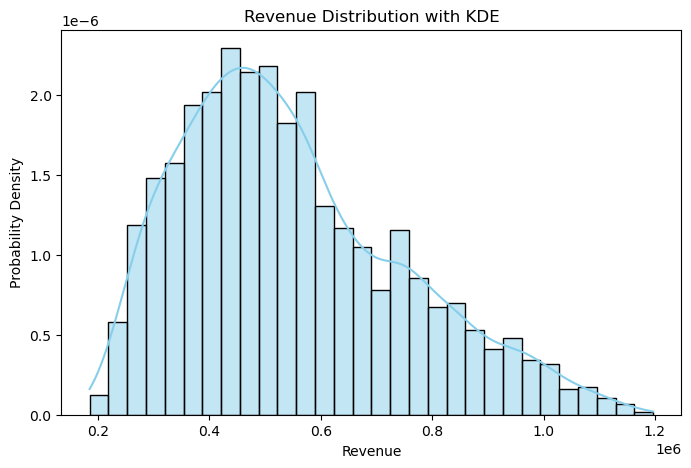

In [5]:
plt.figure(figsize=(8, 5))
sns.histplot(data=nonurban_train_df, x='Revenue', kde=True, bins=30, color='skyblue',stat='density')

plt.title('Revenue Distribution with KDE')
plt.xlabel('Revenue')
plt.ylabel('Probability Density')
plt.show()

In [6]:
nonurban_train_df['log_revenue'] = np.log(nonurban_train_df['Revenue'])  # or np.log1p if any very small values


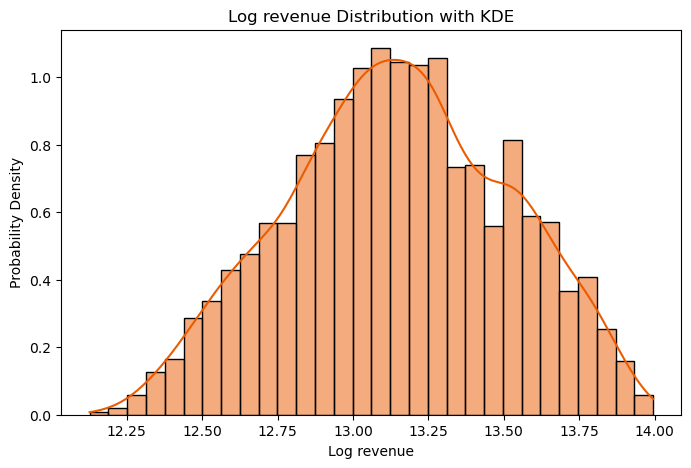

In [7]:
plt.figure(figsize=(8, 5))
sns.histplot(data=nonurban_train_df, x='log_revenue', kde=True, bins=30, color="#EB5B00",stat='density')

plt.title('Log revenue Distribution with KDE')
plt.xlabel('Log revenue')
plt.ylabel('Probability Density')
plt.show()

In [8]:
stat, p = shapiro(nonurban_train_df['log_revenue'])
print(f"Shapiro-Wilk test statistic = {stat:.4f}, p-value = {p:.4f}")


Shapiro-Wilk test statistic = 0.9919, p-value = 0.0000


In [9]:
nonurban_train_df['revenue_boxcox'], fitted_lambda = boxcox(nonurban_train_df['Revenue'])
print(f"Lambda used for Box-Cox: {fitted_lambda}")


Lambda used for Box-Cox: 0.06493034505772827


In [10]:
stat, p = shapiro(nonurban_train_df['revenue_boxcox'])
print(f"Shapiro-Wilk test statistic = {stat:.4f}, p-value = {p:.4f}")


Shapiro-Wilk test statistic = 0.9920, p-value = 0.0000


## Revenue is not normal Use log transformation

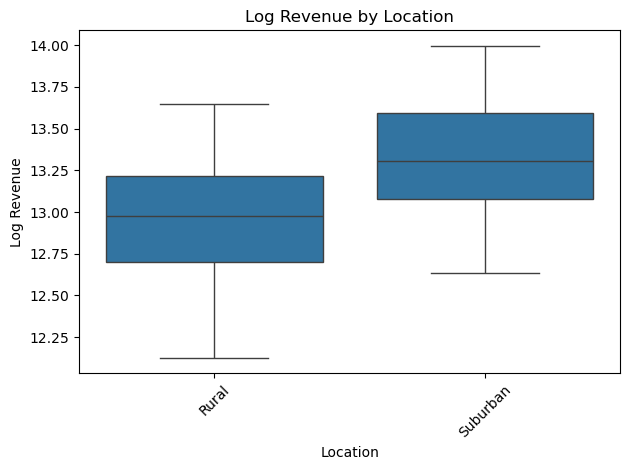

In [12]:
sns.boxplot(data=nonurban_train_df, x='Location', y='log_revenue')

# Optional formatting
plt.title('Log Revenue by Location')
plt.xlabel('Location')
plt.ylabel('Log Revenue')
plt.xticks(rotation=45)  # rotate labels if locations have long names
plt.tight_layout()
plt.show()

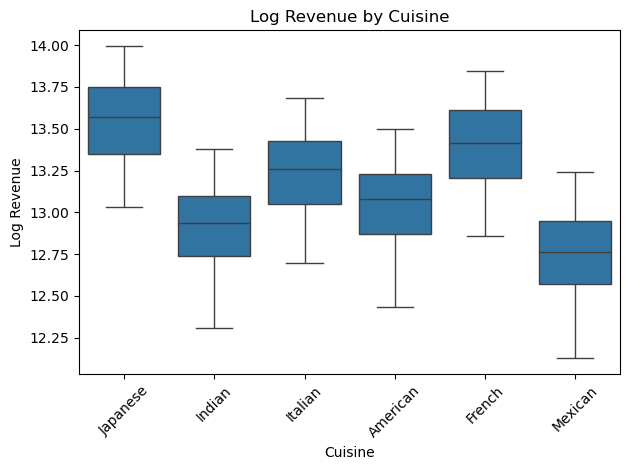

In [13]:
sns.boxplot(data=nonurban_train_df, x='Cuisine', y='log_revenue')

# Optional formatting
plt.title('Log Revenue by Cuisine')
plt.xlabel('Cuisine')
plt.ylabel('Log Revenue')
plt.xticks(rotation=45)  # rotate labels if locations have long names
plt.tight_layout()
plt.show()

In [14]:
groups = [group['log_revenue'].values for name, group in nonurban_train_df.groupby('Cuisine')]

stat, p = kruskal(*groups)
print(f"Kruskal-Wallis statistic = {stat:.4f}, p-value = {p:.4f}")

Kruskal-Wallis statistic = 2225.6188, p-value = 0.0000


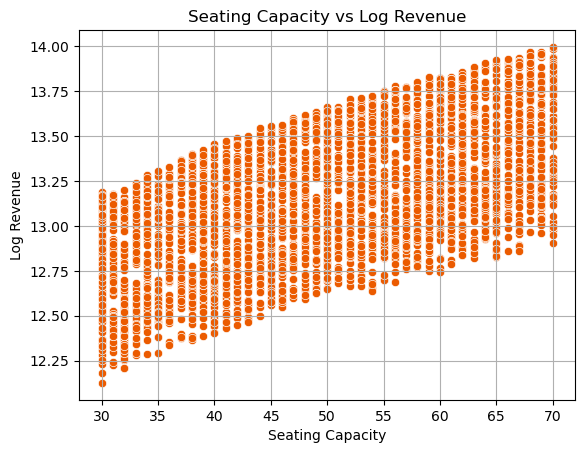

In [15]:
sns.scatterplot(data=nonurban_train_df, x='Seating Capacity', y='log_revenue', color = "#EB5B00")

# Optional enhancements
plt.title('Seating Capacity vs Log Revenue')
plt.xlabel('Seating Capacity')
plt.ylabel('Log Revenue')
plt.grid(True)
plt.show()

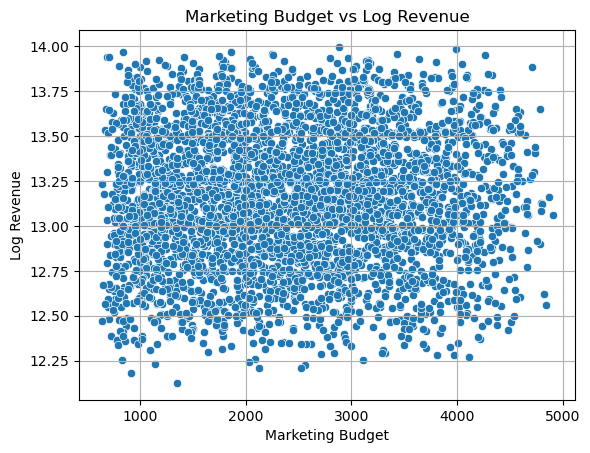

In [16]:
sns.scatterplot(data=nonurban_train_df, x='Marketing Budget', y='log_revenue')

# Optional enhancements
plt.title('Marketing Budget vs Log Revenue')
plt.xlabel('Marketing Budget')
plt.ylabel('Log Revenue')
plt.grid(True)
plt.show()

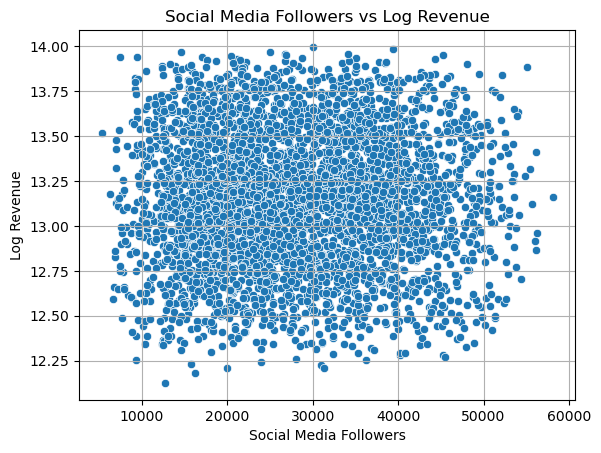

In [17]:
sns.scatterplot(data=nonurban_train_df, x='Social Media Followers', y='log_revenue')

# Optional enhancements
plt.title('Social Media Followers vs Log Revenue')
plt.xlabel('Social Media Followers')
plt.ylabel('Log Revenue')
plt.grid(True)
plt.show()

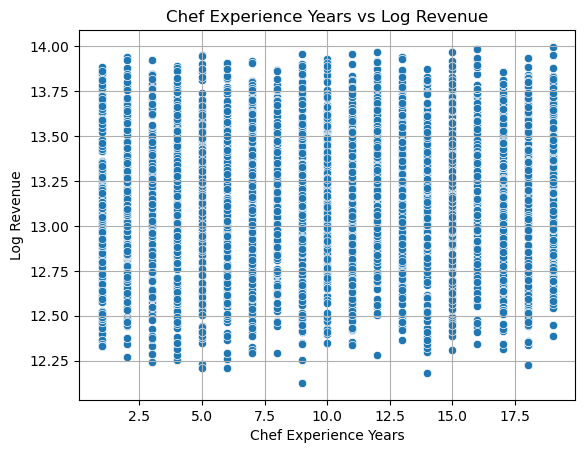

In [18]:
sns.scatterplot(data=nonurban_train_df, x='Chef Experience Years', y='log_revenue')

# Optional enhancements
plt.title('Chef Experience Years vs Log Revenue')
plt.xlabel('Chef Experience Years')
plt.ylabel('Log Revenue')
plt.grid(True)
plt.show()

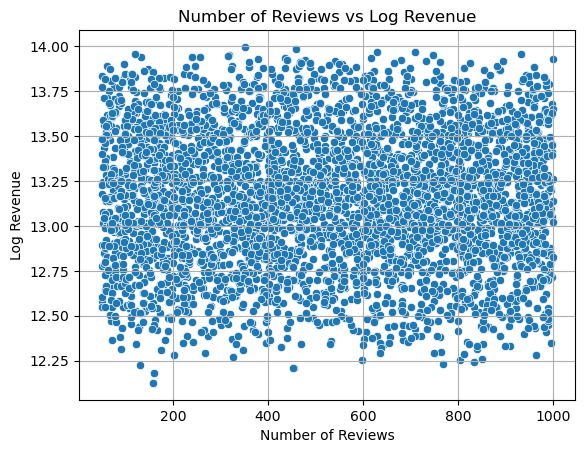

In [19]:
sns.scatterplot(data=nonurban_train_df, x='Number of Reviews', y='log_revenue')

# Optional enhancements
plt.title('Number of Reviews vs Log Revenue')
plt.xlabel('Number of Reviews')
plt.ylabel('Log Revenue')
plt.grid(True)
plt.show()

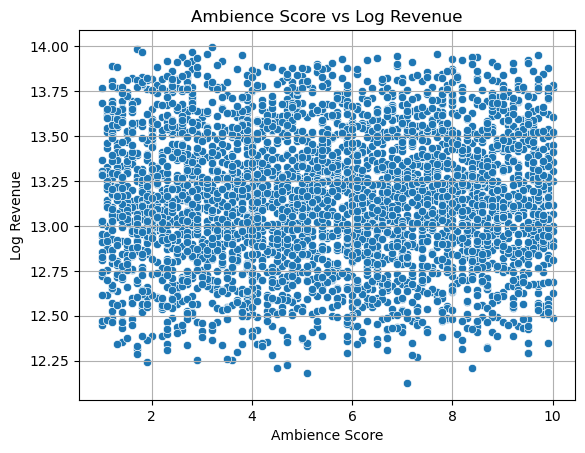

In [20]:
sns.scatterplot(data=nonurban_train_df, x='Ambience Score', y='log_revenue')

# Optional enhancements
plt.title('Ambience Score vs Log Revenue')
plt.xlabel('Ambience Score')
plt.ylabel('Log Revenue')
plt.grid(True)
plt.show()

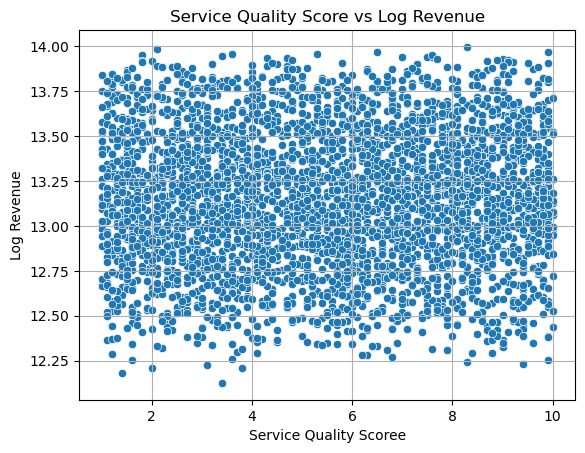

In [21]:
sns.scatterplot(data=nonurban_train_df, x='Service Quality Score', y='log_revenue')

# Optional enhancements
plt.title('Service Quality Score vs Log Revenue')
plt.xlabel('Service Quality Scoree')
plt.ylabel('Log Revenue')
plt.grid(True)
plt.show()

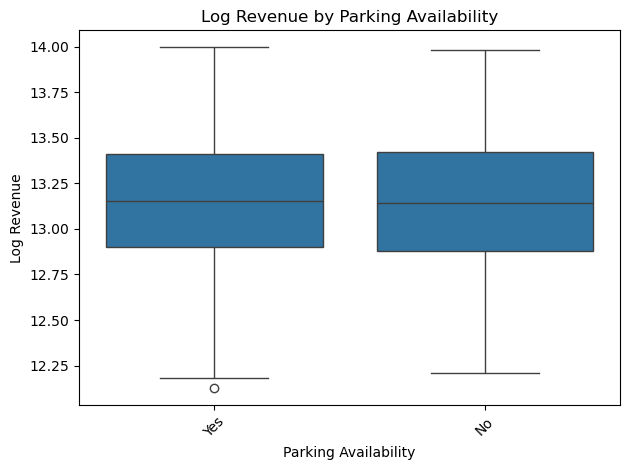

In [26]:
sns.boxplot(data=nonurban_train_df, x='Parking Availability', y='log_revenue')

# Optional formatting
plt.title('Log Revenue by Parking Availability')
plt.xlabel('Parking Availability')
plt.ylabel('Log Revenue')
plt.xticks(rotation=45)  # rotate labels if locations have long names
plt.tight_layout()
plt.show()

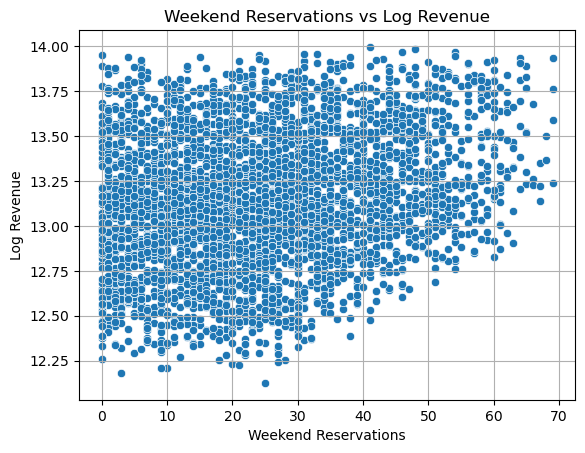

In [29]:
sns.scatterplot(data=nonurban_train_df, x='Weekend Reservations', y='log_revenue')

# Optional enhancements
plt.title('Weekend Reservations vs Log Revenue')
plt.xlabel('Weekend Reservations')
plt.ylabel('Log Revenue')
plt.grid(True)
plt.show()

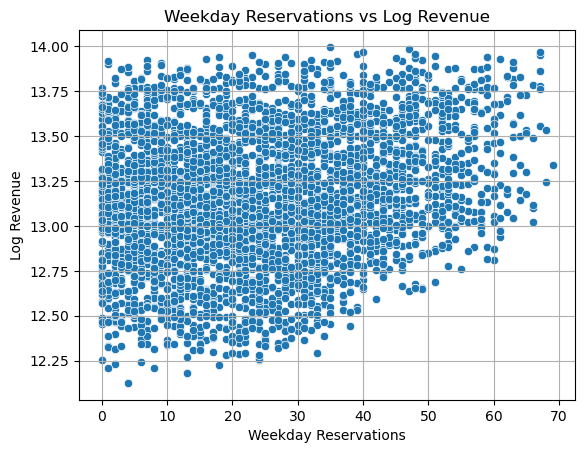

In [34]:
sns.scatterplot(data=nonurban_train_df, x='Weekday Reservations', y='log_revenue')

# Optional enhancements
plt.title('Weekday Reservations vs Log Revenue')
plt.xlabel('Weekday Reservations')
plt.ylabel('Log Revenue')
plt.grid(True)
plt.show()

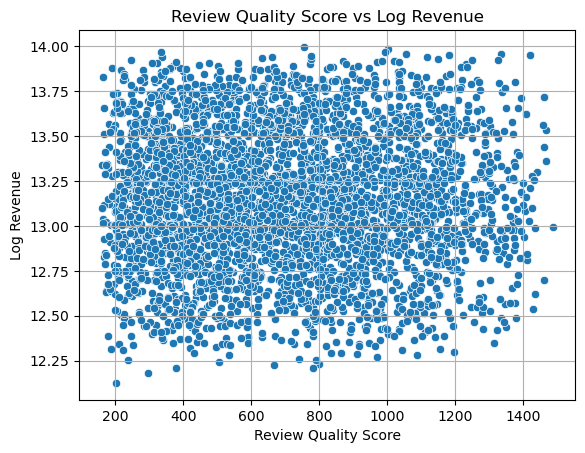

In [38]:
sns.scatterplot(data=nonurban_train_df, x='Review Quality Score', y='log_revenue')

# Optional enhancements
plt.title('Review Quality Score vs Log Revenue')
plt.xlabel('Review Quality Score')
plt.ylabel('Log Revenue')
plt.grid(True)
plt.show()

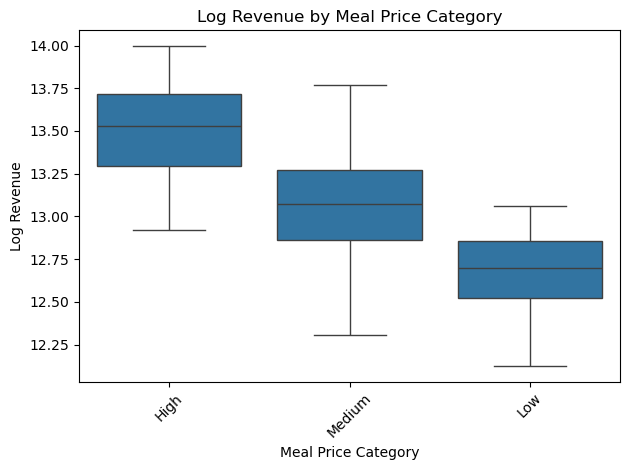

In [43]:
sns.boxplot(data=nonurban_train_df, x='Meal Price Category', y='log_revenue')

# Optional formatting
plt.title('Log Revenue by Meal Price Category')
plt.xlabel('Meal Price Category')
plt.ylabel('Log Revenue')
plt.xticks(rotation=45)  # rotate labels if locations have long names
plt.tight_layout()
plt.show()

In [47]:
groups = [group['log_revenue'].values for name, group in nonurban_train_df.groupby('Meal Price Category')]

stat, p = kruskal(*groups)
print(f"Kruskal-Wallis statistic = {stat:.4f}, p-value = {p:.4f}")

Kruskal-Wallis statistic = 1576.0592, p-value = 0.0000


In [50]:
nonurban_train_df.columns

Index(['Location', 'Cuisine', 'Seating Capacity', 'Marketing Budget',
       'Social Media Followers', 'Chef Experience Years', 'Number of Reviews',
       'Ambience Score', 'Service Quality Score', 'Parking Availability',
       'Weekend Reservations', 'Weekday Reservations', 'Review Quality Score',
       'Meal Price Category', 'clusters', 'Revenue', 'log_revenue',
       'revenue_boxcox'],
      dtype='object')

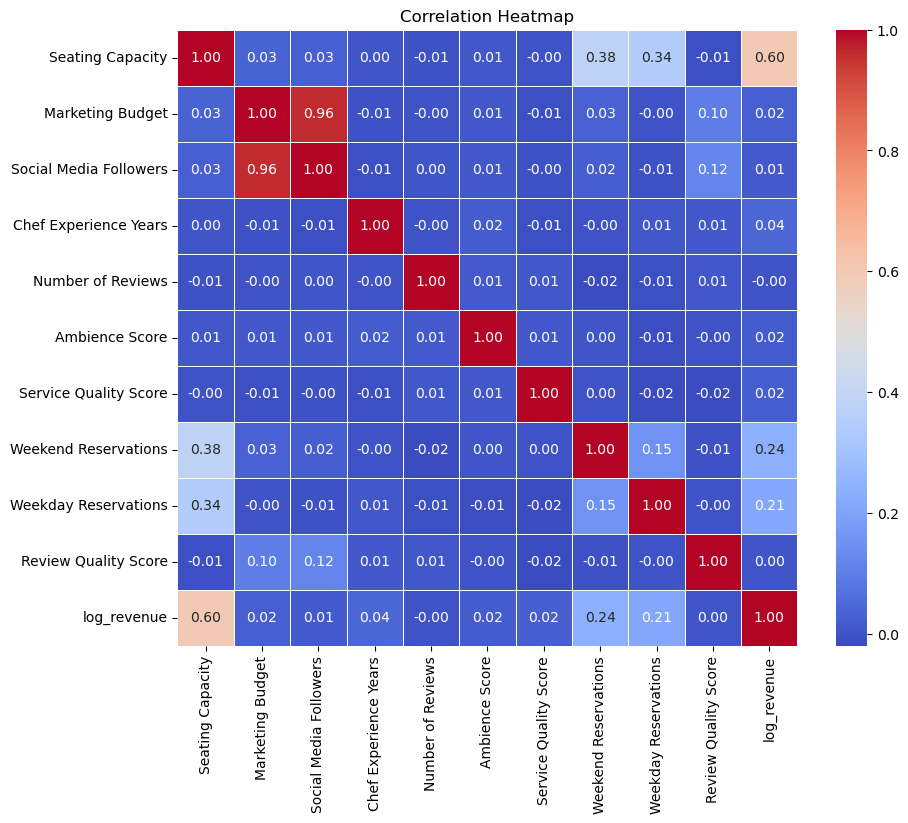

In [52]:
# Correct way to select multiple columns
numeric_df = nonurban_train_df[['Seating Capacity', 'Marketing Budget', 'Social Media Followers', 
                                 'Chef Experience Years', 'Number of Reviews', 'Ambience Score', 
                                 'Service Quality Score', 'Weekend Reservations', 
                                 'Weekday Reservations', 'Review Quality Score', 'log_revenue']]

# Compute the correlation matrix for numeric columns
correlation_matrix = numeric_df.corr()

# Set up the figure and axes for the heatmap
plt.figure(figsize=(10, 8))

# Create a heatmap using Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True)

# Add a title to the heatmap
plt.title("Correlation Heatmap")

# Display the plot
plt.show()


In [57]:
nonurban_train_df[nonurban_train_df['Cuisine'] == 'Mexican']['Revenue'].describe()


count       675.000000
mean     356799.405378
std       83965.455657
min      184708.520000
25%      289025.390000
50%      349185.400000
75%      419186.355000
max      564685.350000
Name: Revenue, dtype: float64

In [59]:
nonurban_train_df[nonurban_train_df['Cuisine'] == 'Mexican']['Location'].value_counts(normalize=True)


Location
Suburban    0.511111
Rural       0.488889
Name: proportion, dtype: float64

In [62]:
nonurban_train_df.groupby('Cuisine')['Meal Price Category'].value_counts(normalize=True).unstack()


Meal Price Category,High,Low,Medium
Cuisine,,,
American,NaN,NaN,1.000000
French,0.532331,NaN,0.467669
Indian,NaN,NaN,1.000000
Italian,NaN,NaN,1.000000
Japanese,1.000000,NaN,NaN
Mexican,NaN,0.46963,0.530370


In [64]:
nonurban_train_df.groupby('Cuisine')['Seating Capacity'].mean().sort_values()


Cuisine
Japanese    49.278383
French      49.445113
Italian     49.843750
Mexican     50.068148
Indian      50.621495
American    50.866980
Name: Seating Capacity, dtype: float64

In [66]:
nonurban_train_df.groupby('Cuisine')['Chef Experience Years'].mean().sort_values()


Cuisine
Japanese     9.555210
Indian       9.663551
Mexican      9.832593
American     9.902973
French      10.251128
Italian     10.337500
Name: Chef Experience Years, dtype: float64

In [68]:
nonurban_train_df.groupby('Cuisine')['Marketing Budget'].mean().sort_values()


Cuisine
French      2379.350376
Mexican     2381.817778
Japanese    2401.160187
Indian      2416.951713
Italian     2435.001563
American    2483.167449
Name: Marketing Budget, dtype: float64

In [70]:
nonurban_train_df['Chef Experience Years'].describe()


count    3904.000000
mean        9.924693
std         5.542186
min         1.000000
25%         5.000000
50%        10.000000
75%        15.000000
max        19.000000
Name: Chef Experience Years, dtype: float64

In [72]:
nonurban_train_df['Marketing Budget'].describe()


count    3904.000000
mean     2415.668289
std       996.353227
min       636.000000
25%      1583.000000
50%      2369.500000
75%      3169.750000
max      4905.000000
Name: Marketing Budget, dtype: float64

In [74]:
nonurban_train_df['Seating Capacity'].describe()


count    3904.000000
mean       50.016906
std        11.586510
min        30.000000
25%        40.000000
50%        50.000000
75%        60.000000
max        70.000000
Name: Seating Capacity, dtype: float64

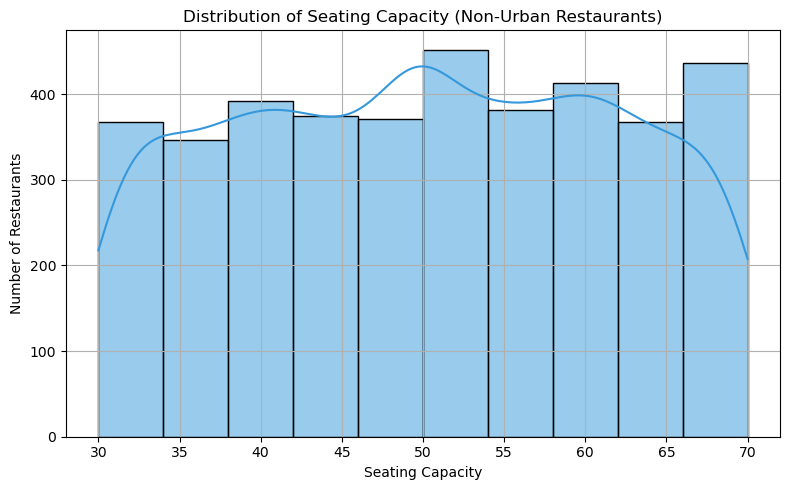

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(nonurban_train_df['Seating Capacity'], bins=10, kde=True, color='#3498db')
plt.title('Distribution of Seating Capacity (Non-Urban Restaurants)')
plt.xlabel('Seating Capacity')
plt.ylabel('Number of Restaurants')
plt.grid(True)
plt.tight_layout()
plt.show()


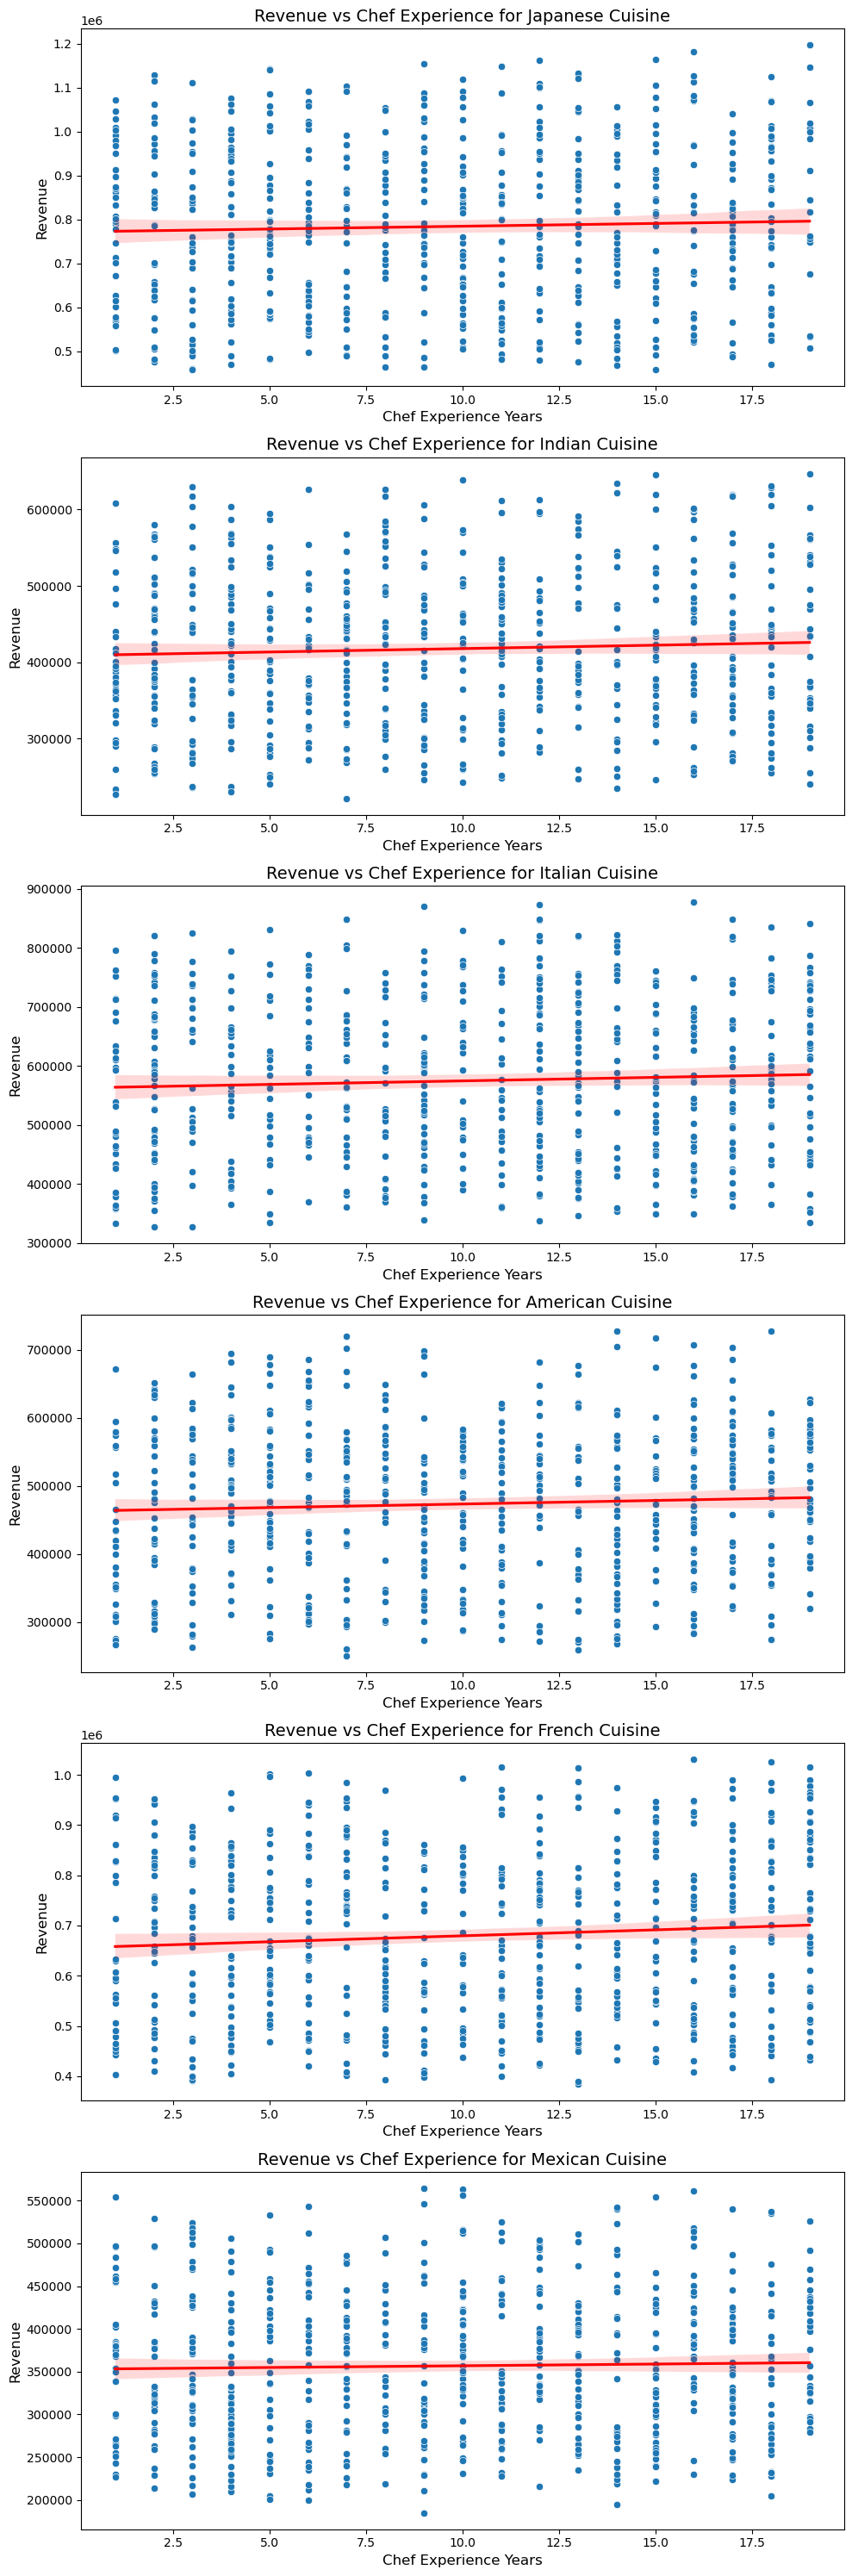

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataframe is nonurban_train_df with 'Cuisine_Type', 'Chef_Experience_Yrs', and 'Revenue'
# Create a unique plot for each cuisine type
cuisine_types = nonurban_train_df['Cuisine'].unique()

# Set the number of rows and columns for subplots based on the number of cuisine types
n_cuisines = len(cuisine_types)
fig, axes = plt.subplots(n_cuisines, 1, figsize=(10, 5 * n_cuisines))

if n_cuisines == 1:
    axes = [axes]  # To make it iterable when only one subplot

# Loop over each cuisine type and create the plot
for i, cuisine in enumerate(cuisine_types):
    ax = axes[i]
    # Filter data for the specific cuisine
    cuisine_data = nonurban_train_df[nonurban_train_df['Cuisine'] == cuisine]
    
    # Create the scatter plot
    sns.scatterplot(data=cuisine_data, x='Chef Experience Years', y='Revenue', ax=ax)
    
    # Set plot title and labels
    ax.set_title(f"Revenue vs Chef Experience for {cuisine} Cuisine", fontsize=14)
    ax.set_xlabel('Chef Experience (Years)', fontsize=12)
    ax.set_ylabel('Revenue', fontsize=12)
    
    # Optional: add a regression line for better insight
    sns.regplot(data=cuisine_data, x='Chef Experience Years', y='Revenue', ax=ax, scatter=False, color='r')

# Adjust layout to avoid overlapping
plt.tight_layout()

# Save and show the plot
plt.savefig('cuisine_revenue_vs_experience_nonurban.png', dpi=300)
plt.show()


In [79]:
print(nonurban_train_df.columns)


Index(['Location', 'Cuisine', 'Seating Capacity', 'Marketing Budget',
       'Social Media Followers', 'Chef Experience Years', 'Number of Reviews',
       'Ambience Score', 'Service Quality Score', 'Parking Availability',
       'Weekend Reservations', 'Weekday Reservations', 'Review Quality Score',
       'Meal Price Category', 'clusters', 'Revenue', 'log_revenue',
       'revenue_boxcox'],
      dtype='object')


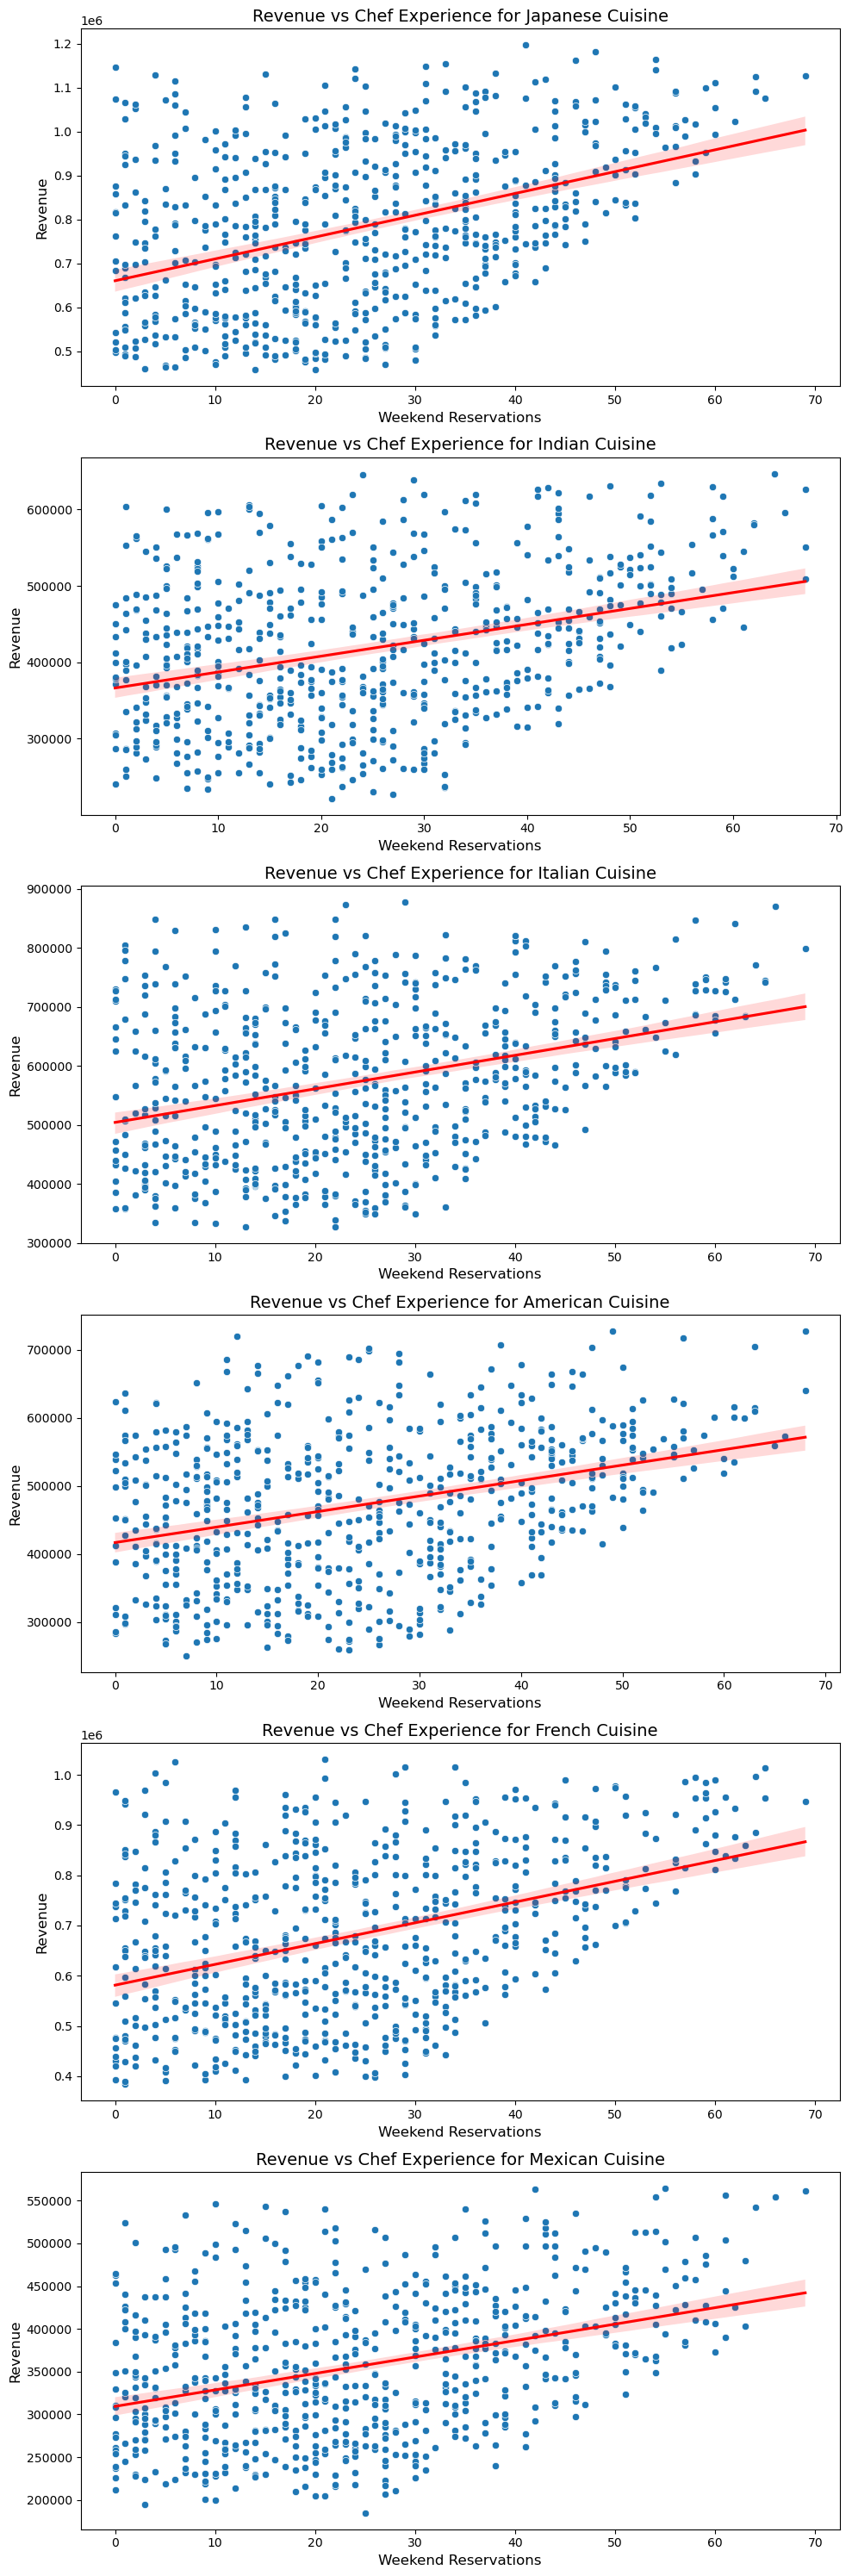

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataframe is nonurban_train_df with 'Cuisine_Type', 'Chef_Experience_Yrs', and 'Revenue'
# Create a unique plot for each cuisine type
cuisine_types = nonurban_train_df['Cuisine'].unique()

# Set the number of rows and columns for subplots based on the number of cuisine types
n_cuisines = len(cuisine_types)
fig, axes = plt.subplots(n_cuisines, 1, figsize=(10, 5 * n_cuisines))

if n_cuisines == 1:
    axes = [axes]  # To make it iterable when only one subplot

# Loop over each cuisine type and create the plot
for i, cuisine in enumerate(cuisine_types):
    ax = axes[i]
    # Filter data for the specific cuisine
    cuisine_data = nonurban_train_df[nonurban_train_df['Cuisine'] == cuisine]
    
    # Create the scatter plot
    sns.scatterplot(data=cuisine_data, x='Weekend Reservations', y='Revenue', ax=ax)
    
    # Set plot title and labels
    ax.set_title(f"Revenue vs Chef Experience for {cuisine} Cuisine", fontsize=14)
    ax.set_xlabel('Chef Experience (Years)', fontsize=12)
    ax.set_ylabel('Revenue', fontsize=12)
    
    # Optional: add a regression line for better insight
    sns.regplot(data=cuisine_data, x='Weekend Reservations', y='Revenue', ax=ax, scatter=False, color='r')

# Adjust layout to avoid overlapping
plt.tight_layout()



In [101]:
cuisine_counts = nonurban_train_df['Cuisine'].value_counts().reset_index()
cuisine_counts.columns = ['Cuisine', 'Count']
print(cuisine_counts)


    Cuisine  Count
0   Mexican    675
1    French    665
2  Japanese    643
3    Indian    642
4   Italian    640
5  American    639


In [103]:
nonurban_train_df['Cuisine'].value_counts(normalize=True) * 100


Cuisine
Mexican     17.289959
French      17.033811
Japanese    16.470287
Indian      16.444672
Italian     16.393443
American    16.367828
Name: proportion, dtype: float64